In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [128]:
#for explain relation between target and predictions
def _relationOfTargetAndPrediction(predicted , model_anme):
    justplot = pd.DataFrame(y_test.values ,columns=["Target"])
    justplot["Predicted"] = predicted
    justplot = justplot.reset_index(drop=True).reset_index()
    fig = px.scatter_3d(justplot, x='index', z='Target', y="Predicted" ,color="Target" )
    fig.update_layout(
        title_text=str(model_anme)
    )
    fig.show()
    
# for explain classification measurement
def _classification_report( predicted ):
    print(confusion_matrix(y_test, predicted))
    print('Classification Report: ')
    print(classification_report(y_test, predicted))
    #plot_confusion_matrix(model, x_test, y_test)  
    #plt.show()

# Get Data

In [69]:
init_data = pd.read_csv("./merged_data.csv")
select_columns = ['Total.Cup.Points', 'Species','Country.of.Origin','Processing.Method', 'Aroma', 'Flavor', 'Aftertaste','Acidity','Body', 'Balance', 'Uniformity', 'Moisture', 'altitude_mean_meters']

In [70]:
init_data  = init_data[select_columns]

In [71]:
init_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1339 entries, 0 to 1338
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Total.Cup.Points      1339 non-null   float64
 1   Species               1339 non-null   object 
 2   Country.of.Origin     1338 non-null   object 
 3   Processing.Method     1169 non-null   object 
 4   Aroma                 1339 non-null   float64
 5   Flavor                1339 non-null   float64
 6   Aftertaste            1339 non-null   float64
 7   Acidity               1339 non-null   float64
 8   Body                  1339 non-null   float64
 9   Balance               1339 non-null   float64
 10  Uniformity            1339 non-null   float64
 11  Moisture              1339 non-null   float64
 12  altitude_mean_meters  1109 non-null   float64
dtypes: float64(10), object(3)
memory usage: 136.1+ KB


# Processing Data / Preparation 

In [72]:
init_data['Species'].unique()

array(['Arabica', 'Robusta'], dtype=object)

In [73]:
init_data['Country.of.Origin'].unique()

array(['Ethiopia', 'Guatemala', 'Brazil', 'Peru', 'United States',
       'United States (Hawaii)', 'Indonesia', 'China', 'Costa Rica',
       'Mexico', 'Uganda', 'Honduras', 'Taiwan', 'Nicaragua',
       'Tanzania, United Republic Of', 'Kenya', 'Thailand', 'Colombia',
       'Panama', 'Papua New Guinea', 'El Salvador', 'Japan', 'Ecuador',
       'United States (Puerto Rico)', 'Haiti', 'Burundi', 'Vietnam',
       'Philippines', 'Rwanda', 'Malawi', 'Laos', 'Zambia', 'Myanmar',
       'Mauritius', 'Cote d?Ivoire', nan, 'India'], dtype=object)

In [74]:
init_data['Processing.Method'].unique()

array(['Washed / Wet', nan, 'Natural / Dry', 'Pulped natural / honey',
       'Semi-washed / Semi-pulped', 'Other'], dtype=object)

### show sum of missing values

In [75]:
init_data.isnull().sum()

Total.Cup.Points          0
Species                   0
Country.of.Origin         1
Processing.Method       170
Aroma                     0
Flavor                    0
Aftertaste                0
Acidity                   0
Body                      0
Balance                   0
Uniformity                0
Moisture                  0
altitude_mean_meters    230
dtype: int64

In [76]:
init_data = init_data.dropna()

### show sum of missing values after drop missing values

In [77]:
init_data.isnull().sum()

Total.Cup.Points        0
Species                 0
Country.of.Origin       0
Processing.Method       0
Aroma                   0
Flavor                  0
Aftertaste              0
Acidity                 0
Body                    0
Balance                 0
Uniformity              0
Moisture                0
altitude_mean_meters    0
dtype: int64

In [78]:
init_data.describe()

,Total.Cup.Points,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Moisture,altitude_mean_meters
count,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000
mean,82.115577,7.567897,7.514294,7.386772,7.527196,7.505656,7.500622,9.869516,0.094689,1813.965837
std,2.626653,0.300706,0.323467,0.332248,0.307302,0.272702,0.340476,0.444271,0.043684,9067.972349
min,59.830000,5.080000,6.170000,6.170000,5.250000,6.330000,6.080000,6.000000,0.000000,1.000000
25%,81.170000,7.420000,7.330000,7.170000,7.330000,7.330000,7.330000,10.000000,0.100000,1100.000000
50%,82.420000,7.580000,7.500000,7.420000,7.500000,7.500000,7.500000,10.000000,0.110000,1310.640000
75%,83.580000,7.750000,7.670000,7.580000,7.670000,7.670000,7.670000,10.000000,0.120000,1600.000000
max,90.580000,8.750000,8.830000,8.670000,8.750000,8.500000,8.580000,10.000000,0.170000,190164.000000


# Split X and Y

In [79]:
Y = init_data['Total.Cup.Points']
init_X = init_data.iloc[:,1:]

In [80]:
init_X.head()

,Species,Country.of.Origin,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Moisture,altitude_mean_meters
0,Arabica,Ethiopia,Washed / Wet,8.67,8.83,8.67,8.75,8.50,8.42,10.0,0.12,2075.0
1,Arabica,Ethiopia,Washed / Wet,8.75,8.67,8.50,8.58,8.42,8.42,10.0,0.12,2075.0
3,Arabica,Ethiopia,Natural / Dry,8.17,8.58,8.42,8.42,8.50,8.25,10.0,0.11,2000.0
4,Arabica,Ethiopia,Washed / Wet,8.25,8.50,8.25,8.50,8.42,8.33,10.0,0.12,2075.0
9,Arabica,Ethiopia,Natural / Dry,8.08,8.58,8.50,8.50,7.67,8.42,10.0,0.10,1822.5


In [81]:
std = StandardScaler()

In [82]:
numberic_col = ['Aroma' ,'Flavor' ,'Aftertaste' ,'Acidity' ,'Balance' ,'Uniformity' ,'Moisture' ,'altitude_mean_meters']

In [83]:
x_std= std.fit_transform(init_X[numberic_col])
x_outlier_checking = pd.DataFrame(x_std,columns=numberic_col)
x_outlier_checking.head()

,Aroma,Flavor,Aftertaste,Acidity,Balance,Uniformity,Moisture,altitude_mean_meters
0,3.666864,4.069526,3.864168,3.981118,2.701608,0.293848,0.579691,0.028801
1,3.933036,3.574640,3.352249,3.427644,2.701608,0.293848,0.579691,0.028801
2,2.003288,3.296267,3.111346,2.906727,2.202060,0.293848,0.350663,0.020526
3,2.269460,3.048824,2.599428,3.167186,2.437141,0.293848,0.579691,0.028801
4,1.703844,3.296267,3.352249,3.167186,2.701608,0.293848,0.121636,0.000942


In [84]:
x_outlier_checking.describe()

,Aroma,Flavor,Aftertaste,Acidity,Balance,Uniformity,Moisture,altitude_mean_meters
count,1.013000e+03,1.013000e+03,1.013000e+03,1.013000e+03,1.013000e+03,1.013000e+03,1.013000e+03,1.013000e+03
mean,-4.188160e-15,2.745309e-15,-4.289209e-15,-4.260714e-15,-7.888940e-15,-6.729289e-16,-5.479877e-16,1.007064e-16
std,1.000494e+00,1.000494e+00,1.000494e+00,1.000494e+00,1.000494e+00,1.000494e+00,1.000494e+00,1.000494e+00
min,-8.277615e+00,-4.157951e+00,-3.664050e+00,-7.413937e+00,-4.174521e+00,-8.714121e+00,-2.168642e+00,-2.000294e-01
25%,-4.920771e-01,-5.700286e-01,-6.527627e-01,-6.420184e-01,-5.013753e-01,2.938483e-01,1.216357e-01,-7.877378e-02
50%,4.026742e-02,-4.421240e-02,1.000592e-01,-8.854429e-02,-1.827508e-03,2.938483e-01,3.506634e-01,-5.553330e-02
75%,6.058834e-01,4.816037e-01,5.818651e-01,4.649298e-01,4.977203e-01,2.938483e-01,5.796911e-01,-2.360743e-02
max,3.933036e+00,4.069526e+00,3.864168e+00,3.981118e+00,3.171770e+00,2.938483e-01,1.724830e+00,2.078117e+01


In [85]:
fig = px.box(x_outlier_checking)
fig.show()

# Correlation Detect

In [86]:
#sns.pairplot(x_outlier_checking ,hue="Aroma")

In [87]:
X_std = x_outlier_checking
X_corr = X_std.corr()

In [88]:
fig = px.imshow(X_corr, text_auto=True ,aspect="auto" )
fig.show()

In [89]:
lower_cor = pd.DataFrame(np.tril(X_corr, -1), columns = X_corr.columns)
lower_cor

,Aroma,Flavor,Aftertaste,Acidity,Balance,Uniformity,Moisture,altitude_mean_meters
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,0.730360,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,0.678193,0.848149,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,0.603052,0.751411,0.689565,0.000000,0.000000,0.000000,0.000000,0.0
4,0.610976,0.734293,0.764381,0.645033,0.000000,0.000000,0.000000,0.0
5,0.134722,0.222691,0.241899,0.192677,0.242988,0.000000,0.000000,0.0
6,-0.081144,-0.118622,-0.166376,-0.101806,-0.213424,-0.001482,0.000000,0.0
7,-0.019391,-0.012992,-0.026866,0.003164,-0.016469,-0.012309,0.018695,0.0


In [90]:
to_drop = [column for column in lower_cor if any(lower_cor[column] > abs(0.80) )]
to_drop

['Flavor']

In [91]:
x_norm = x_outlier_checking.drop(to_drop ,axis=1)
x_norm.head()

,Aroma,Aftertaste,Acidity,Balance,Uniformity,Moisture,altitude_mean_meters
0,3.666864,3.864168,3.981118,2.701608,0.293848,0.579691,0.028801
1,3.933036,3.352249,3.427644,2.701608,0.293848,0.579691,0.028801
2,2.003288,3.111346,2.906727,2.202060,0.293848,0.350663,0.020526
3,2.269460,2.599428,3.167186,2.437141,0.293848,0.579691,0.028801
4,1.703844,3.352249,3.167186,2.701608,0.293848,0.121636,0.000942


# Prepare X (get dumies for category feat.)

In [92]:
# get non-numerric features
categorical_features = init_X.select_dtypes(include=object).columns.tolist()
categorical_features

['Species', 'Country.of.Origin', 'Processing.Method']

In [93]:
# convert categorical_features to dummies
X_categorical= pd.get_dummies(init_X[categorical_features], columns = categorical_features, drop_first=True)
X_categorical = X_categorical.reset_index(drop=True)
X_categorical.head()

,Species_Robusta,Country.of.Origin_Burundi,Country.of.Origin_China,Country.of.Origin_Colombia,Country.of.Origin_Costa Rica,Country.of.Origin_Cote d?Ivoire,Country.of.Origin_Ecuador,Country.of.Origin_El Salvador,Country.of.Origin_Ethiopia,Country.of.Origin_Guatemala,...,Country.of.Origin_Thailand,Country.of.Origin_Uganda,Country.of.Origin_United States,Country.of.Origin_United States (Puerto Rico),Country.of.Origin_Vietnam,Country.of.Origin_Zambia,Processing.Method_Other,Processing.Method_Pulped natural / honey,Processing.Method_Semi-washed / Semi-pulped,Processing.Method_Washed / Wet
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


## Concat X_norm and X_category

In [94]:
x_norm.head()

,Aroma,Aftertaste,Acidity,Balance,Uniformity,Moisture,altitude_mean_meters
0,3.666864,3.864168,3.981118,2.701608,0.293848,0.579691,0.028801
1,3.933036,3.352249,3.427644,2.701608,0.293848,0.579691,0.028801
2,2.003288,3.111346,2.906727,2.202060,0.293848,0.350663,0.020526
3,2.269460,2.599428,3.167186,2.437141,0.293848,0.579691,0.028801
4,1.703844,3.352249,3.167186,2.701608,0.293848,0.121636,0.000942


In [95]:
X = pd.concat([x_norm, X_categorical], join="inner" ,axis=1)
X.head()

,Aroma,Aftertaste,Acidity,Balance,Uniformity,Moisture,altitude_mean_meters,Species_Robusta,Country.of.Origin_Burundi,Country.of.Origin_China,...,Country.of.Origin_Thailand,Country.of.Origin_Uganda,Country.of.Origin_United States,Country.of.Origin_United States (Puerto Rico),Country.of.Origin_Vietnam,Country.of.Origin_Zambia,Processing.Method_Other,Processing.Method_Pulped natural / honey,Processing.Method_Semi-washed / Semi-pulped,Processing.Method_Washed / Wet
0,3.666864,3.864168,3.981118,2.701608,0.293848,0.579691,0.028801,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,3.933036,3.352249,3.427644,2.701608,0.293848,0.579691,0.028801,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2.003288,3.111346,2.906727,2.202060,0.293848,0.350663,0.020526,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2.269460,2.599428,3.167186,2.437141,0.293848,0.579691,0.028801,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1.703844,3.352249,3.167186,2.701608,0.293848,0.121636,0.000942,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Prepare Y 

In [96]:
Bean_Grade = [1,2,3]

In [97]:
rating_pctile = np.percentile( Y, [75, 90])

In [98]:
# define Bean score to grade [1,2,3] 
Y = np.where(Y < rating_pctile[0], 1, Y)
Y = np.where((Y >= rating_pctile[0]) & (Y <= rating_pctile[1]), 2, Y)
Y =np.where(Y> rating_pctile[1], 3, Y)

In [99]:
Y = pd.DataFrame(Y , columns=["bean_grade"])
Y

,bean_grade
0,3.0
1,3.0
2,3.0
3,3.0
4,3.0
...,...
1008,1.0
1009,1.0
1010,1.0
1011,1.0


### Show Number of Samples for each Bean Grade

In [100]:
count =  Y['bean_grade'].value_counts()
fig = px.bar(count, text_auto=True , title="Number of Samples for each Bean Grade" )
fig.show()


# Prepare Train / Test Split

In [101]:
Rseed = 40
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = Rseed)

In [102]:
print("XTrain : ",x_train.shape)
print("Xtest : ",x_test.shape)
print("yTrain : ",y_train.shape)
print("ytest : ",y_test.shape)

XTrain :  (678, 45)
Xtest :  (335, 45)
yTrain :  (678, 1)
ytest :  (335, 1)


In [103]:
y_test

,bean_grade
995,1.0
649,1.0
287,1.0
478,1.0
561,1.0
...,...
764,1.0
845,1.0
608,1.0
166,2.0


<AxesSubplot:ylabel='Aftertaste'>

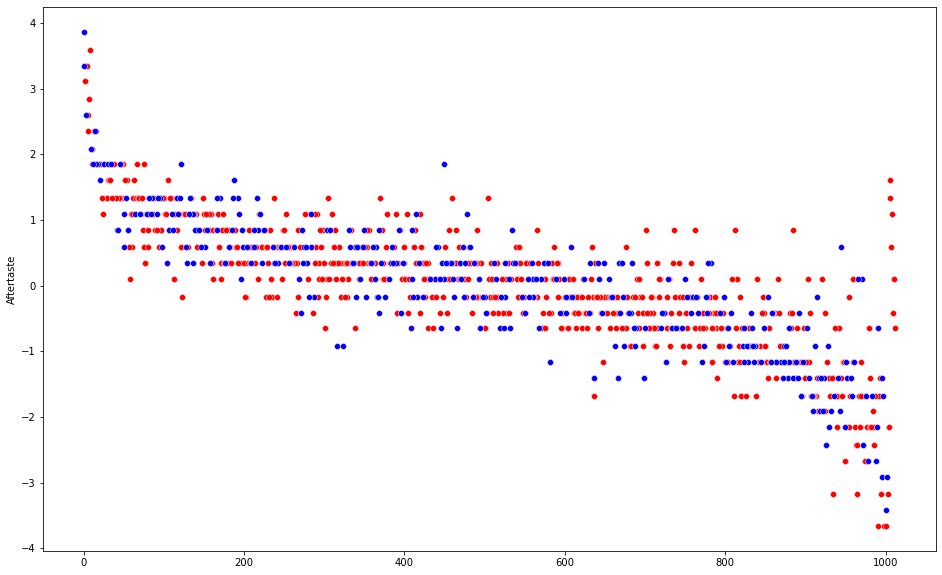

In [104]:
plt.figure(figsize=(16,10))
sns.scatterplot(data=X["Aftertaste"] ,color="r")
sns.scatterplot(data=x_train["Aftertaste"] ,color="r")
sns.scatterplot(data=x_test["Aftertaste"] ,color="b")

# 7.2 MODEL PREPARATION

## 7.2 (a) KNN Model Training and Testing

In [105]:
# KNN parameter
k = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 25, 35] # try at least 3 values

In [106]:
modelKNN = KNeighborsClassifier(n_neighbors=19, p=2)
modelKNN.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=19)

In [107]:
y_pred= modelKNN.predict(x_test)
KNNScore = accuracy_score(y_test, y_pred)
KNNScore

0.9014925373134328

In [108]:
# loop each k values then fit that model and measure it !!
test_error_rate= []
for k_value in k :
    knn_model = KNeighborsClassifier(n_neighbors=k_value)
    knn_model.fit(x_train, y_train)
    
    y_pred_test = knn_model.predict(x_test)
    
    test_error= accuracy_score(y_test, y_pred_test)
    test_error_rate.append(test_error)

In [109]:
test_error_rate = np.array(test_error_rate).reshape(-1,1)
k_values = np.array(k).reshape(-1,1)

test_error_rate = np.around(test_error_rate ,decimals=9)
desired_array = [str(numeric_string) for numeric_string in k_values] # tosting k array

In [110]:
# Create dataframe for visaulization
knn_error_rate = pd.DataFrame(test_error_rate ,columns=["error_rate"])
knn_error_rate["k_values"] = desired_array

In [111]:
fig = px.line(knn_error_rate ,x="k_values" ,y="error_rate", text="error_rate" )
fig.update_traces(textposition="bottom right" ,marker_size=12, marker_line_width=1.5)
fig.show()

In [112]:
fig = px.bar(knn_error_rate, x='k_values', y='error_rate' ,text="error_rate" ,range_y=[0.5,1] ,color="k_values")
fig.show()

# KNN Classification Reports

In [113]:
_classification_report(y_test , y_pred ,knn_model)

[[244   6   2]
 [ 14  38   4]
 [  0   7  20]]
Classification Report: 
              precision    recall  f1-score   support

         1.0       0.95      0.97      0.96       252
         2.0       0.75      0.68      0.71        56
         3.0       0.77      0.74      0.75        27

    accuracy                           0.90       335
   macro avg       0.82      0.80      0.81       335
weighted avg       0.90      0.90      0.90       335



In [114]:
_relationOfTargetAndPrediction(y_pred ,"KNN CLASSIFICATION")

# Decision Tree Model Training and Testing

In [116]:
from sklearn import tree

In [117]:
ModelDT = DecisionTreeClassifier(criterion="entropy",splitter='best' ,max_depth=5)
ModelDT.fit(x_train,y_train)
tree_pred = ModelDT.predict(x_test)

## decistion tree score

In [118]:
TreeScore = accuracy_score(y_test, tree_pred)
TreeScore

0.844776119402985

# Visualize Decision Tree

In [119]:
# get feature name and labels
feature_names = x_train.columns
labels = np.unique(y_train)
labels = [str(label) for label in labels]

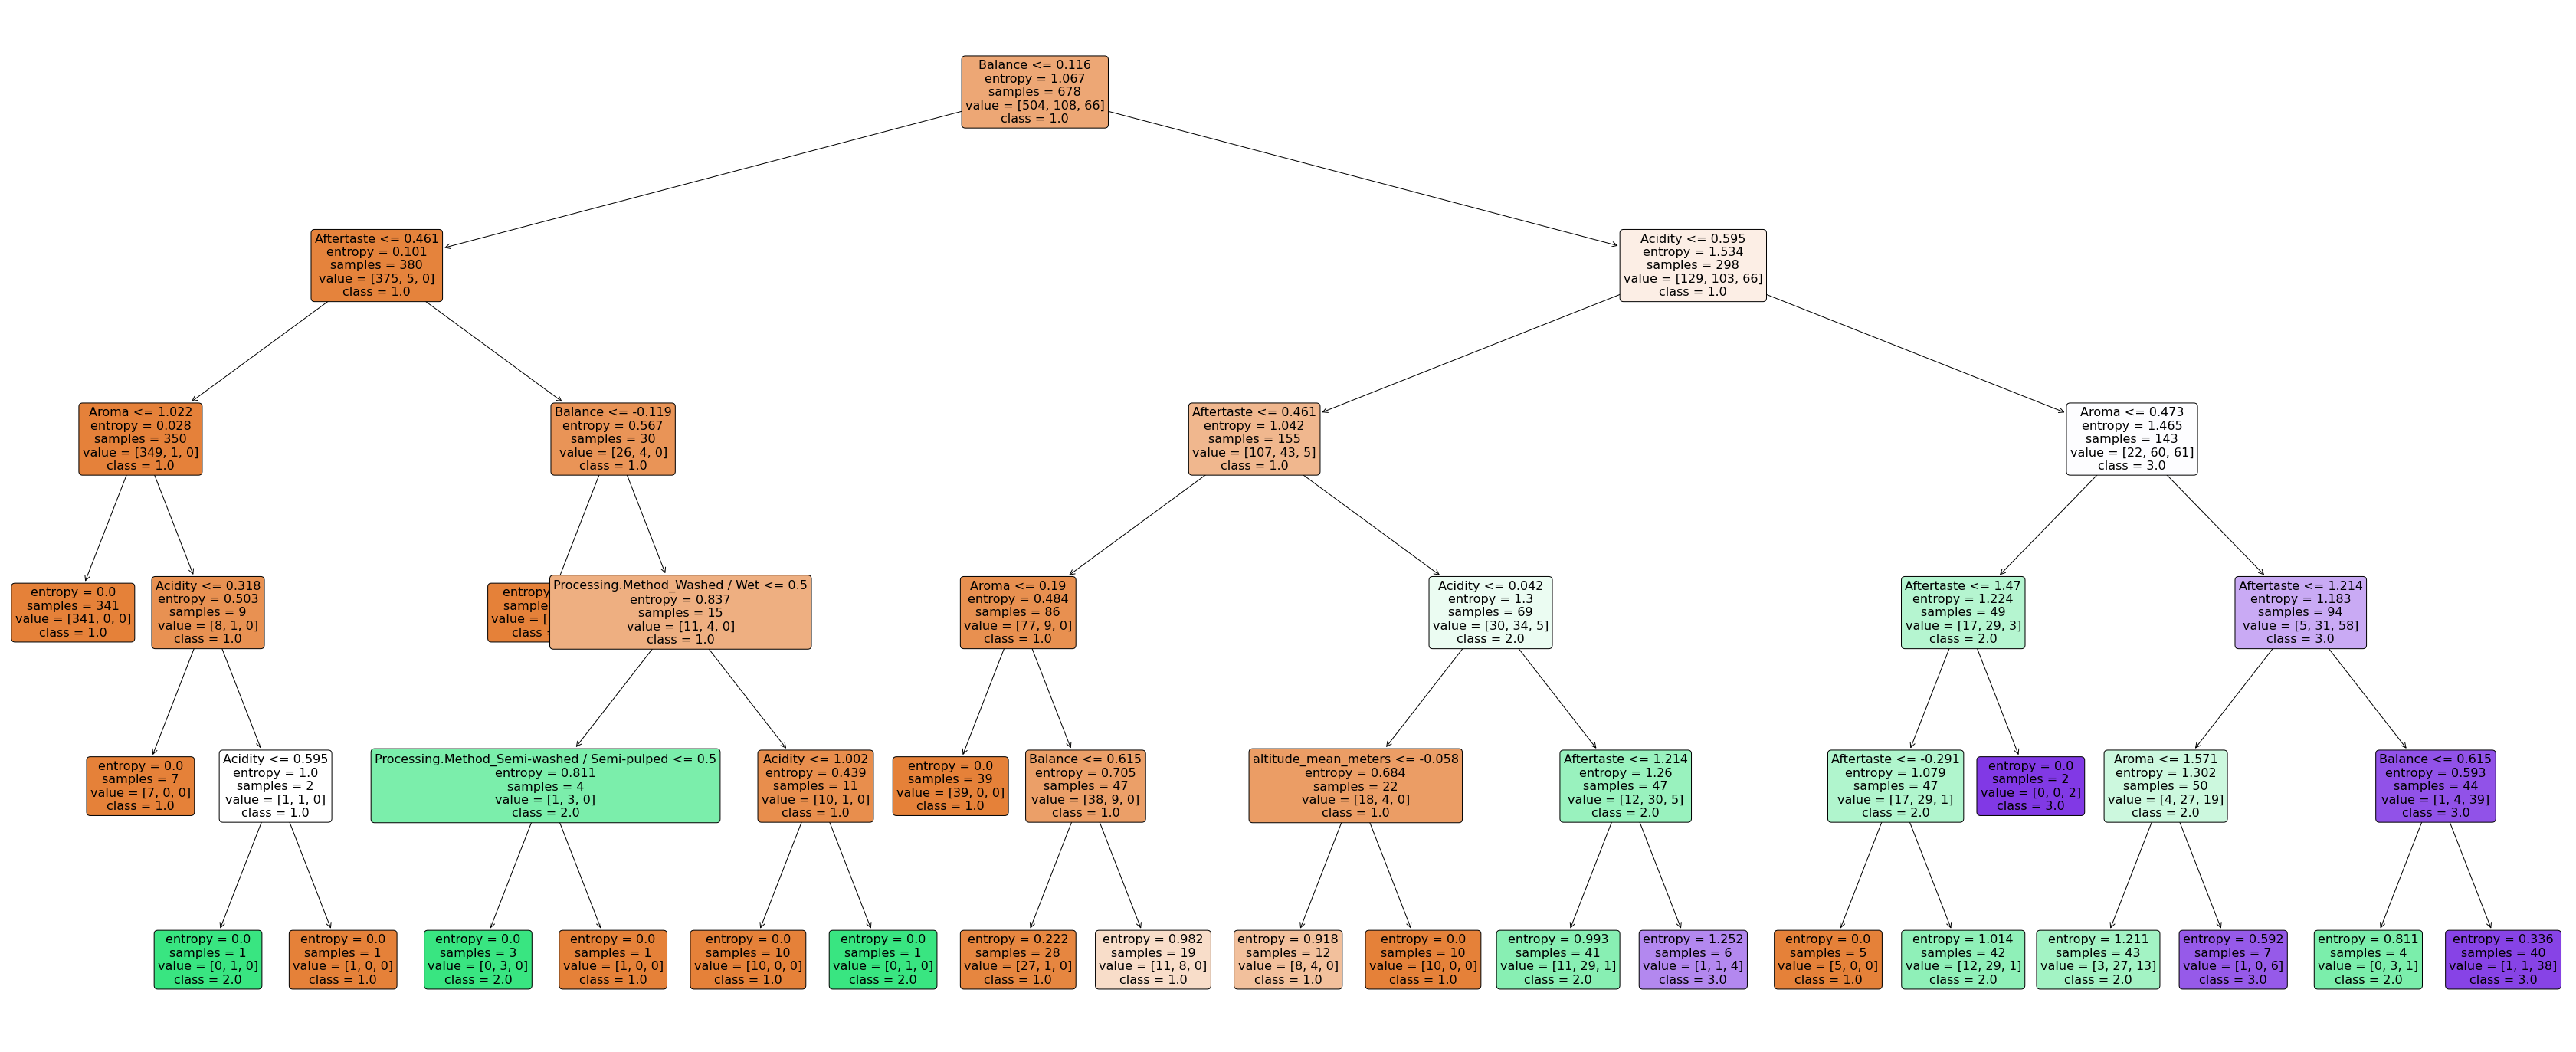

In [120]:
plt.figure(figsize=(60,25))
tree.plot_tree( ModelDT,
feature_names = feature_names,
class_names = labels,
rounded = True,
filled = True, fontsize=16)
plt.show()

# Decision Tree Classification Reports

In [121]:
_classification_report(y_test , tree_pred ,ModelDT)

[[244   6   2]
 [ 14  38   4]
 [  0   7  20]]
Classification Report: 
              precision    recall  f1-score   support

         1.0       0.95      0.92      0.93       252
         2.0       0.56      0.62      0.59        56
         3.0       0.59      0.63      0.61        27

    accuracy                           0.84       335
   macro avg       0.70      0.72      0.71       335
weighted avg       0.86      0.84      0.85       335



In [123]:
_relationOfTargetAndPrediction(tree_pred ,"Decision Tree Models ")

# 7.2 (c) Random Forest Model Training and Testing

In [124]:
#define params
ASM_function = ['entropy', 'gini'] 
nEstimator = 100
nJob = -1
rState = 10

### Training model

In [125]:
RandomF = RandomForestClassifier(criterion=ASM_function[0],n_estimators=nEstimator, n_jobs=nJob, random_state=rState)
RandomF.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_jobs=-1, random_state=10)

In [126]:
randf_pred= RandomF.predict(x_test)

In [127]:
 accuracy_score(y_test, randf_pred)

0.8835820895522388

In [129]:
_classification_report(randf_pred)

[[244   4   4]
 [ 17  31   8]
 [  1   5  21]]
Classification Report: 
              precision    recall  f1-score   support

         1.0       0.93      0.97      0.95       252
         2.0       0.78      0.55      0.65        56
         3.0       0.64      0.78      0.70        27

    accuracy                           0.88       335
   macro avg       0.78      0.77      0.77       335
weighted avg       0.88      0.88      0.88       335



In [130]:
_relationOfTargetAndPrediction(randf_pred , "Random Forest")

In [185]:
feature_imp = pd.Series(RandomF.feature_importances_, index = feature_names).sort_values(ascending=False)
feature_imp_df  = pd.DataFrame(feature_imp).reset_index()
feature_imp_df.head()

,index,0
0,Aftertaste,0.212307
1,Acidity,0.197717
2,Balance,0.170732
3,Aroma,0.146307
4,altitude_mean_meters,0.080831


In [188]:
fig = px.line(feature_imp_df ,x=0, y="index" , text=0 ,height=1200 ,width=1200 )
fig.update_traces(textposition="bottom right" ,marker_size=5, marker_line_width=.1  )
fig.show()

# HYPERPARAMETER TUNING 

In [196]:
classification = { 'KNN': KNeighborsClassifier(), 'DT': DecisionTreeClassifier(), 'RF': RandomForestClassifier() }

In [197]:
# Create Parameter Dictionary for KNN
K_list = [1, 3, 5, 7, 9 , 11, 13, 15, 17, 19, 21, 23, 25, 35, 45]
KNN_param = dict(n_neighbors=K_list)

In [200]:
# Create Parameter Dictionary for Decision Tree
ASM_function = ["entropy", "gini"]
maxD = [ 4, 5, 6, None]
maxF = ["auto", "log2", None]
minSample = [1,2, 4]
DT_param= dict(criterion=ASM_function, max_depth = maxD, min_samples_leaf = minSample, max_features = maxF)

In [207]:
# Create Parameter Dictionary for Random Forest (including same parameters as Decision Tree)
nEst = [10, 30, 50, 100]
RF_param = dict(n_estimators = nEst, criterion=ASM_function, max_depth = maxD, min_samples_leaf = minSample,
max_features = maxF)

{'n_estimators': [10, 30, 50, 100],
 'criterion': ['entropy', 'gini'],
 'max_depth': [4, 5, 6, None],
 'min_samples_leaf': [1, 2, 4],
 'max_features': ['auto', 'log2', None]}

# Perform GridsearchCV() for each classification model

In [231]:
for target in classification:
    clf = classification[target]
    if(target == "KNN" ):
        params = KNN_param
    elif (target == "DT"):
        params = DT_param
    elif(target == "RF"):
        params = RF_param
    
grid = GridSearchCV( 
                estimator=clf, 
                    n_jobs = -1,
                    verbose = 10,
                    cv = 5,
                    scoring = "accuracy",
                   param_grid = params )

In [228]:
grid_result = grid.fit(x_train, y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


In [241]:
BEST_PARAMS = grid_result.best_estimator_
BEST_PARAMS

RandomForestClassifier(max_features='log2', n_estimators=50)

In [346]:
train_params=pd.DataFrame(grid_result.cv_results_)[["params" ,"mean_test_score" ,"std_test_score","rank_test_score"]]
train_params = train_params.sort_values(by=["rank_test_score"]).reset_index(drop=True)
train_params = train_params.iloc[:20].reset_index()
train_params.head()

,index,params,mean_test_score,std_test_score,rank_test_score
0,0,"{'criterion': 'gini', 'max_depth': None, 'max_...",0.892244,0.027026,1
1,1,"{'criterion': 'entropy', 'max_depth': 5, 'max_...",0.889390,0.025014,2
2,2,"{'criterion': 'gini', 'max_depth': None, 'max_...",0.889346,0.022529,3
3,3,"{'criterion': 'gini', 'max_depth': None, 'max_...",0.887930,0.021391,4
4,4,"{'criterion': 'gini', 'max_depth': 6, 'max_fea...",0.887898,0.018315,5


In [377]:
fig = px.bar(train_params ,x="mean_test_score", y="index" 
             , text="mean_test_score" 
             ,orientation="h" 
             ,color="mean_test_score" ,range_x=[-.1,1] 
             ,height=1000,
            )
fig.add_trace(
    go.Scatter(
        name="Std",
        x=train_params.std_test_score,
        y=train_params.index,
        mode='lines+markers',
        line=go.scatter.Line(color="red"),
        text=train_params.std_test_score,
        showlegend=False,
    )

)
fig.show()

In [315]:
BEST_MODEL = BEST_PARAMS.fit(x_train, y_train)

In [319]:
BEST_MODEL_PRED = BEST_MODEL.predict(x_test)
accuracy_score(y_test , BEST_MODEL_PRED)

0.8835820895522388

In [320]:
_classification_report(BEST_MODEL_PRED)

[[241   8   3]
 [ 12  35   9]
 [  0   7  20]]
Classification Report: 
              precision    recall  f1-score   support

         1.0       0.95      0.96      0.95       252
         2.0       0.70      0.62      0.66        56
         3.0       0.62      0.74      0.68        27

    accuracy                           0.88       335
   macro avg       0.76      0.77      0.76       335
weighted avg       0.88      0.88      0.88       335



In [327]:
_classification_report(tree_pred)

[[231  20   1]
 [ 10  35  11]
 [  2   8  17]]
Classification Report: 
              precision    recall  f1-score   support

         1.0       0.95      0.92      0.93       252
         2.0       0.56      0.62      0.59        56
         3.0       0.59      0.63      0.61        27

    accuracy                           0.84       335
   macro avg       0.70      0.72      0.71       335
weighted avg       0.86      0.84      0.85       335



In [324]:
_relationOfTargetAndPrediction(BEST_MODEL_PRED ,"BEST MODEL")
_relationOfTargetAndPrediction(randf_pred ,"RANDOM FOREST ")
_relationOfTargetAndPrediction( tree_pred,"DECISION TREE")
_relationOfTargetAndPrediction(y_pred ,"KNN")

# Play ground

In [193]:
def _visualization(predicted , model_anme):
    justplot= y_test
    justplot["Predicted"] = predicted
    justplot = justplot.reset_index(drop=True).reset_index()
    fig = px.scatter_3d(justplot, x='index', z='bean_grade', y="Predicted" ,color="bean_grade" )
    fig.update_layout(
        title_text=str(model_anme)
    )
    fig.show()

In [ ]:
_visualization(y_pred , "KNN Classification")

In [ ]:
x_test.iloc[:, 0].min()

In [ ]:
import plotly.graph_objects as go
import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

mesh_size = .5
margin = 0.25



# Create a mesh grid on which we will run our model
x_min, x_max = x_test.iloc[:, 0].min() - margin, x_test.iloc[:, 0].max() + margin
y_min, y_max = x_test.iloc[:, 1].min() - margin, x_test.iloc[:, 1].max() + margin

xrange = np.arange(x_min, x_max, mesh_size)
yrange = np.arange(y_min, y_max, mesh_size)
xx, yy = np.meshgrid(xrange, yrange)

# Create classifier, run predictions on grida
clf = KNeighborsClassifier(15, weights='uniform')
clf.fit(X, y)
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)


# Plot the figure
fig = go.Figure(data=[
    go.Contour(
        x=xrange,
        y=yrange,
        z=Z,
        colorscale='RdBu'
    )
])
fig.show()